Lab 4: Coffee Lovers Unite

In [186]:
pip install beautifulsoup4

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

Scrape Starbucks

In [2]:
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
starbucks_soup = BeautifulSoup(response.content, "html.parser")
starbucks_tables = starbucks_soup.find_all("table", class_ = "wpr-table")[0]

In [3]:
starrows=[]
starbucksloc=[]

for th in starbucks_tables.find_all("th")[4:]:
    states=th.get_text(strip = True)
    starbucksloc.append(states)

for i, tr in enumerate(starbucks_tables.find_all("tr")[1:]):
    state=starbucksloc[i]

    cells= tr.find_all("td")

    stores2023= cells[0].get_text(strip = True)
    stores2021= cells[1].get_text(strip = True)
    stores2024= cells[2].get_text(strip = True)

    starrows.append({"State":state, "Year":2023, "Stores":stores2023, "Company":"Starbucks"})
    starrows.append({"State":state, "Year":2021, "Stores":stores2021, "Company":"Starbucks"})
    starrows.append({"State":state, "Year":2024, "Stores":stores2024, "Company":"Starbucks"})

starbucks= pd.DataFrame(starrows)
starbucks


,State,Year,Stores,Company
0,California,2023,"3,080",Starbucks
1,California,2021,"2,959",Starbucks
2,California,2024,"3,117",Starbucks
3,Texas,2023,"1,346",Starbucks
4,Texas,2021,"1,215",Starbucks
...,...,...,...,...
148,North Dakota,2021,20,Starbucks
149,North Dakota,2024,,Starbucks
150,Vermont,2023,8,Starbucks
151,Vermont,2021,35,Starbucks


Scrape for Dunkin

In [4]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")
dunkin_table = dunkin_soup.find("table", class_ = "wpr-table")

In [5]:
dunrows=[]
dunkinloc=[]

for th in dunkin_table.find_all("th")[3:]:
    states=th.get_text(strip = True)
    dunkinloc.append(states)

for i, tr in enumerate(dunkin_table.find_all("tr")[1:]):
    state=dunkinloc[i]

    cells= tr.find_all("td")

    stores2024= cells[0].get_text(strip = True)
    stores2023= cells[1].get_text(strip = True)

    dunrows.append({"State":state, "Year":2024, "Stores":stores2024, "Company":"Dunkin"})
    dunrows.append({"State":state, "Year":2023, "Stores":stores2023, "Company":"Dunkin"})

dunkin= pd.DataFrame(dunrows)
dunkin

,State,Year,Stores,Company
0,New York,2024,"1,431",Dunkin
1,New York,2023,"1,414",Dunkin
2,Massachusetts,2024,"1,042",Dunkin
3,Massachusetts,2023,"1,068",Dunkin
4,Florida,2024,909,Dunkin
...,...,...,...,...
97,Oregon,2023,0,Dunkin
98,South Dakota,2024,0,Dunkin
99,South Dakota,2023,0,Dunkin
100,Washington,2024,0,Dunkin


Parse, Merge, and Tidy

In [6]:
coffee=pd.merge(dunkin, starbucks, on=["State", "Year", "Company", "Stores"], how="outer")
print(coffee)

       State  Year Stores    Company
0    Alabama  2021     99  Starbucks
1    Alabama  2023     59     Dunkin
2    Alabama  2023     85  Starbucks
3    Alabama  2024     69     Dunkin
4    Alabama  2024         Starbucks
..       ...   ...    ...        ...
250  Wyoming  2021     26  Starbucks
251  Wyoming  2023      1     Dunkin
252  Wyoming  2023     23  Starbucks
253  Wyoming  2024      1     Dunkin
254  Wyoming  2024         Starbucks

[255 rows x 4 columns]


State Populations and Names

In [8]:
popresponse = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
popsoup = BeautifulSoup(popresponse.content, "html.parser")
poptable = popsoup.find("table", class_ = "wikitable")

In [9]:
poprows = []

for tr in poptable.find_all("tr")[1:]:
    cells = tr.find_all('td')
    if len(cells) >= 3:
        state = cells[2].get_text(strip = True)
        population = cells[3].get_text(strip = True)


        poprows.append({
        "State": state,
        "Population": population})

pop = pd.DataFrame(poprows)

Merge with coffee

In [10]:
coffee2 = pd.merge(coffee, pop, on="State", how="inner")
print(coffee2)

       State  Year Stores    Company Population
0    Alabama  2021     99  Starbucks  5,024,279
1    Alabama  2023     59     Dunkin  5,024,279
2    Alabama  2023     85  Starbucks  5,024,279
3    Alabama  2024     69     Dunkin  5,024,279
4    Alabama  2024         Starbucks  5,024,279
..       ...   ...    ...        ...        ...
250  Wyoming  2021     26  Starbucks    576,851
251  Wyoming  2023      1     Dunkin    576,851
252  Wyoming  2023     23  Starbucks    576,851
253  Wyoming  2024      1     Dunkin    576,851
254  Wyoming  2024         Starbucks    576,851

[255 rows x 5 columns]


Choose to look at stock, and merge financial data with coffee/state data

In [11]:
findata={
    "Company": ["Starbucks","Dunkin", "Starbucks", "Dunkin", "Starbucks", "Dunkin"],
    "Stock":[97.31,106.48, 95.88, 106.48,116.38,106.48],
    "Year": [2024, 2024, 2023, 2023, 2021, 2021]
}
findata=pd.DataFrame(findata)
coffeefin = pd.merge(coffee2, findata, on=["Company", "Year"])
print(coffeefin)

       State  Year Stores    Company Population   Stock
0    Alabama  2021     99  Starbucks  5,024,279  116.38
1    Alabama  2023     59     Dunkin  5,024,279  106.48
2    Alabama  2023     85  Starbucks  5,024,279   95.88
3    Alabama  2024     69     Dunkin  5,024,279  106.48
4    Alabama  2024         Starbucks  5,024,279   97.31
..       ...   ...    ...        ...        ...     ...
250  Wyoming  2021     26  Starbucks    576,851  116.38
251  Wyoming  2023      1     Dunkin    576,851  106.48
252  Wyoming  2023     23  Starbucks    576,851   95.88
253  Wyoming  2024      1     Dunkin    576,851  106.48
254  Wyoming  2024         Starbucks    576,851   97.31

[255 rows x 6 columns]


Create region Varible

In [12]:
statereg = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Northeast", "New York": "Northeast", "Pennsylvania": "Northeast",

    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest",
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest",
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",

    "Delaware": "South", "Florida": "South", "Georgia": "South",
    "Maryland": "South", "North Carolina": "South", "South Carolina": "South",
    "Virginia": "South", "Washington, D.C.": "South", "West Virginia": "South",
    "Alabama": "South", "Kentucky": "South", "Mississippi": "South",
    "Tennessee": "South", "Arkansas": "South", "Louisiana": "South",
    "Oklahoma": "South", "Texas": "South",

    "Arizona": "West", "Colorado": "West", "Idaho": "West",
    "Montana": "West", "Nevada": "West", "New Mexico": "West",
    "Utah": "West", "Wyoming": "West", "Alaska": "West",
    "California": "West", "Hawaii": "West", "Oregon": "West",
    "Washington": "West"
}

In [13]:
coffeefin["Region"] = coffeefin["State"].map(statereg)
print(coffeefin)

       State  Year Stores    Company Population   Stock Region
0    Alabama  2021     99  Starbucks  5,024,279  116.38  South
1    Alabama  2023     59     Dunkin  5,024,279  106.48  South
2    Alabama  2023     85  Starbucks  5,024,279   95.88  South
3    Alabama  2024     69     Dunkin  5,024,279  106.48  South
4    Alabama  2024         Starbucks  5,024,279   97.31  South
..       ...   ...    ...        ...        ...     ...    ...
250  Wyoming  2021     26  Starbucks    576,851  116.38   West
251  Wyoming  2023      1     Dunkin    576,851  106.48   West
252  Wyoming  2023     23  Starbucks    576,851   95.88   West
253  Wyoming  2024      1     Dunkin    576,851  106.48   West
254  Wyoming  2024         Starbucks    576,851   97.31   West

[255 rows x 7 columns]


Analyze:

In [14]:
coffeefin["Stores"]=pd.to_numeric(coffeefin["Stores"], errors='coerce')

In [15]:
coffeefin["Population"]=coffeefin["Population"].str.replace(",","")

In [16]:
coffeefin["Population"]=pd.to_numeric(coffeefin["Population"])

In [17]:
from plotnine import *

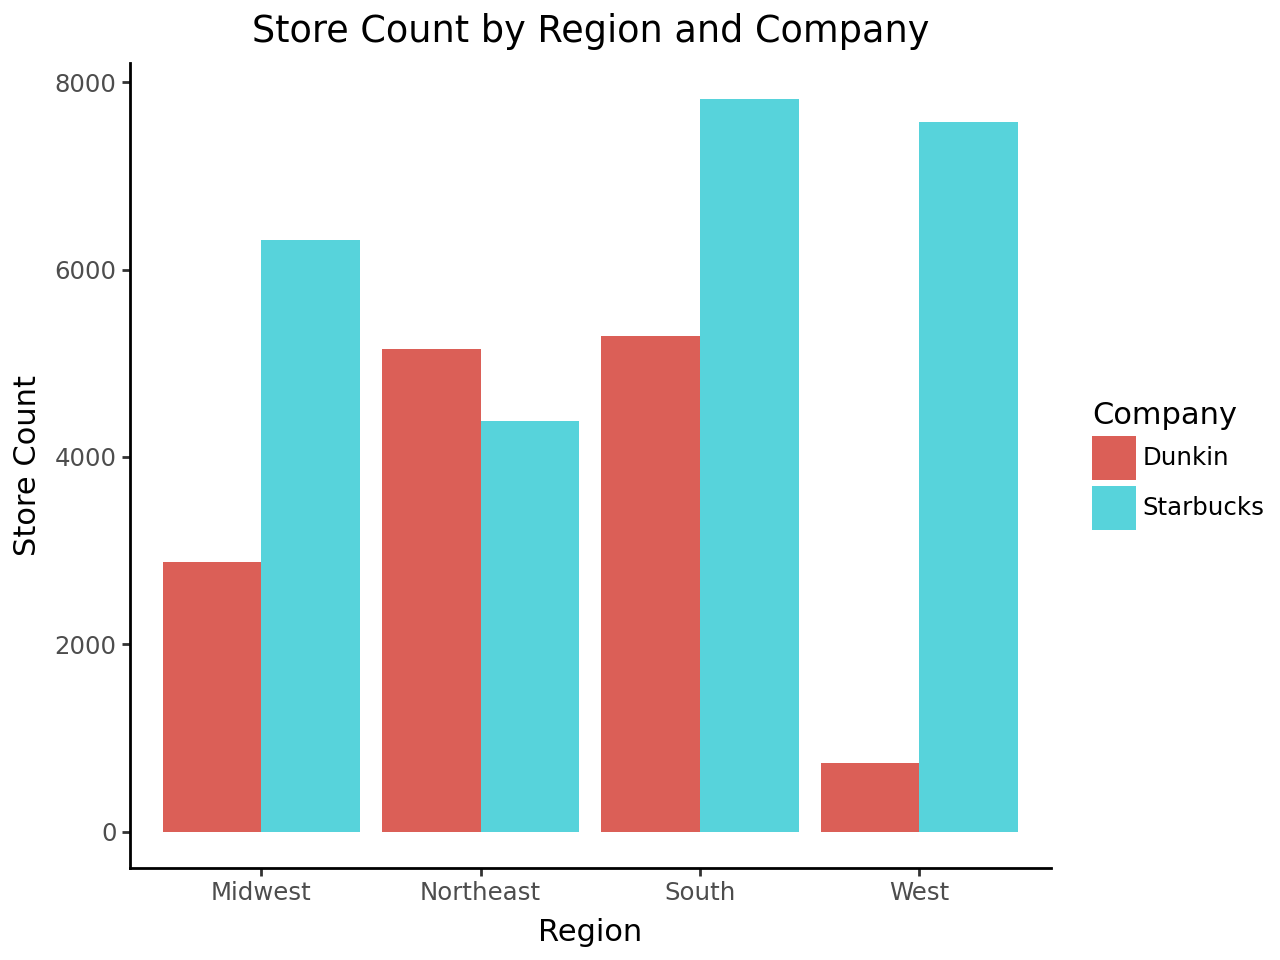

In [18]:
coffeereg2=coffeefin.groupby(["Region", "Company"])["Stores"].sum().reset_index()

(ggplot(coffeereg2,
aes(
  x = "Region",
  y="Stores",
  fill = "Company",
))
+ geom_bar(stat='identity', position="dodge")
+ theme_classic()
+ labs(title="Store Count by Region and Company", x="Region", y="Store Count")
)

By looking at the bar chart above it clear that Starbucks has way more locations than Dunkin especially in the West. Additionally, Dunkin has more locaitions in the Northeast. Where both companys have the most stores is where they were founded and were they hold the marketshare of coffee chains. Starbucks was founded in Washington and Dunkin was founded in Masachusettes. Overall, Starbucks holds the market share of locations in the South, West, and Midwest.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 53 rows containing missing values.


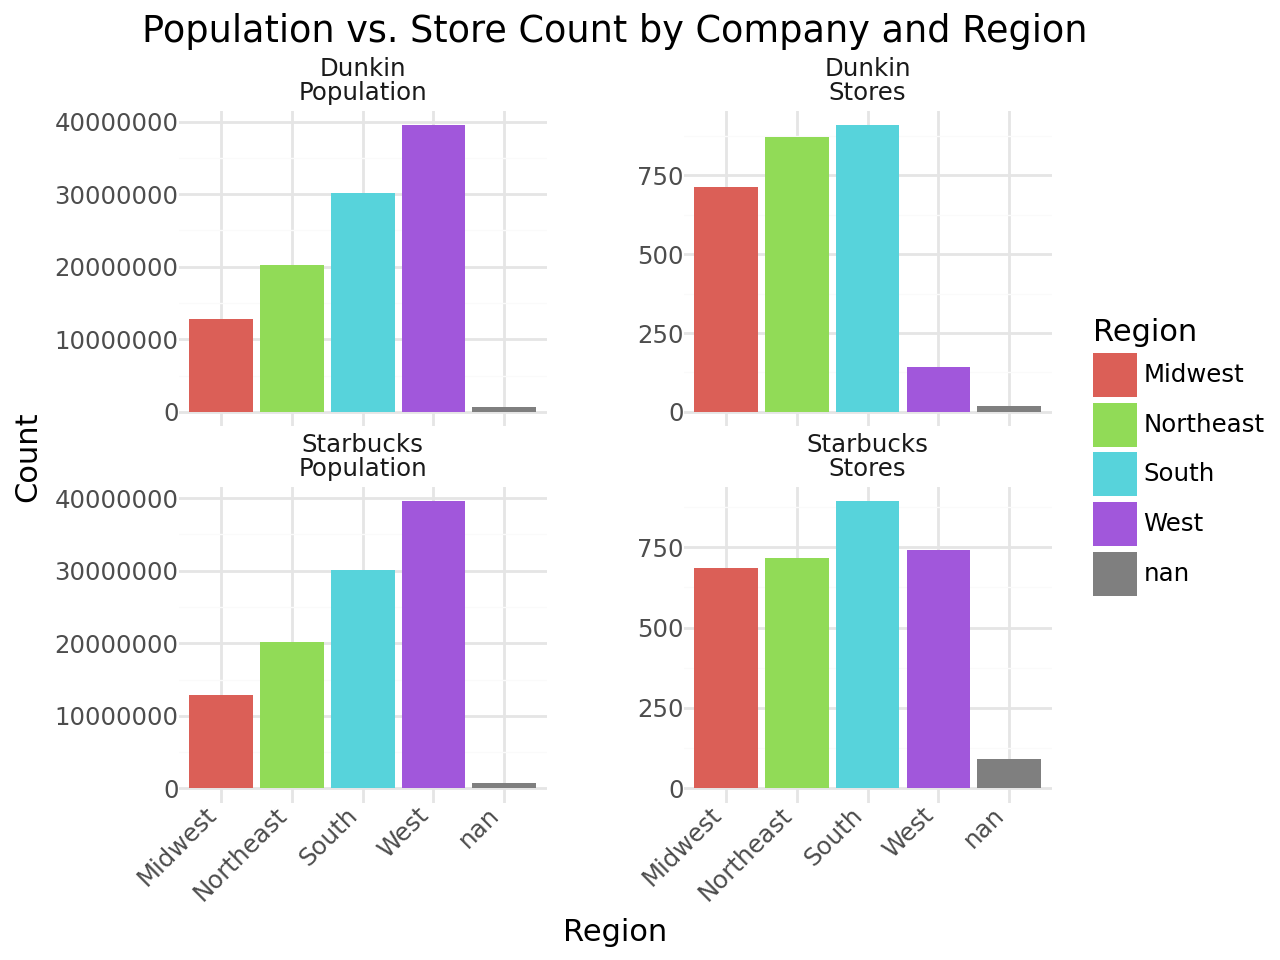

In [19]:
#melt the data so we can show the difference between region store count and population
coffeemelt= pd.melt(coffeefin, id_vars=["Region", "Company"],
                    value_vars=["Stores", "Population"],
                    var_name="Metric",
                    value_name="Count")

(
    ggplot(coffeemelt)
    + aes(x='Region', y='Count', fill='Region')
    + geom_bar(stat='identity', position='dodge')
    + facet_wrap('~Company + Metric', scales='free_y')  # Separate facets for each chain and metric
    + labs(title="Population vs. Store Count by Company and Region", x="Region", y="Count")
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

The graph above shows the distibution of comapny stores compared to the distribution of population over the four regions. Whats suprising is that although the West region has a bigger population that isn't where there is the most stores for both companys. Ignoring the west region both companies follow the same distribution of stores for the midwest, northeat, south regions. And that distribution follow the same distributions for population as well. It would be intresting to see what other major coffee chain has a lot of west locations as well.

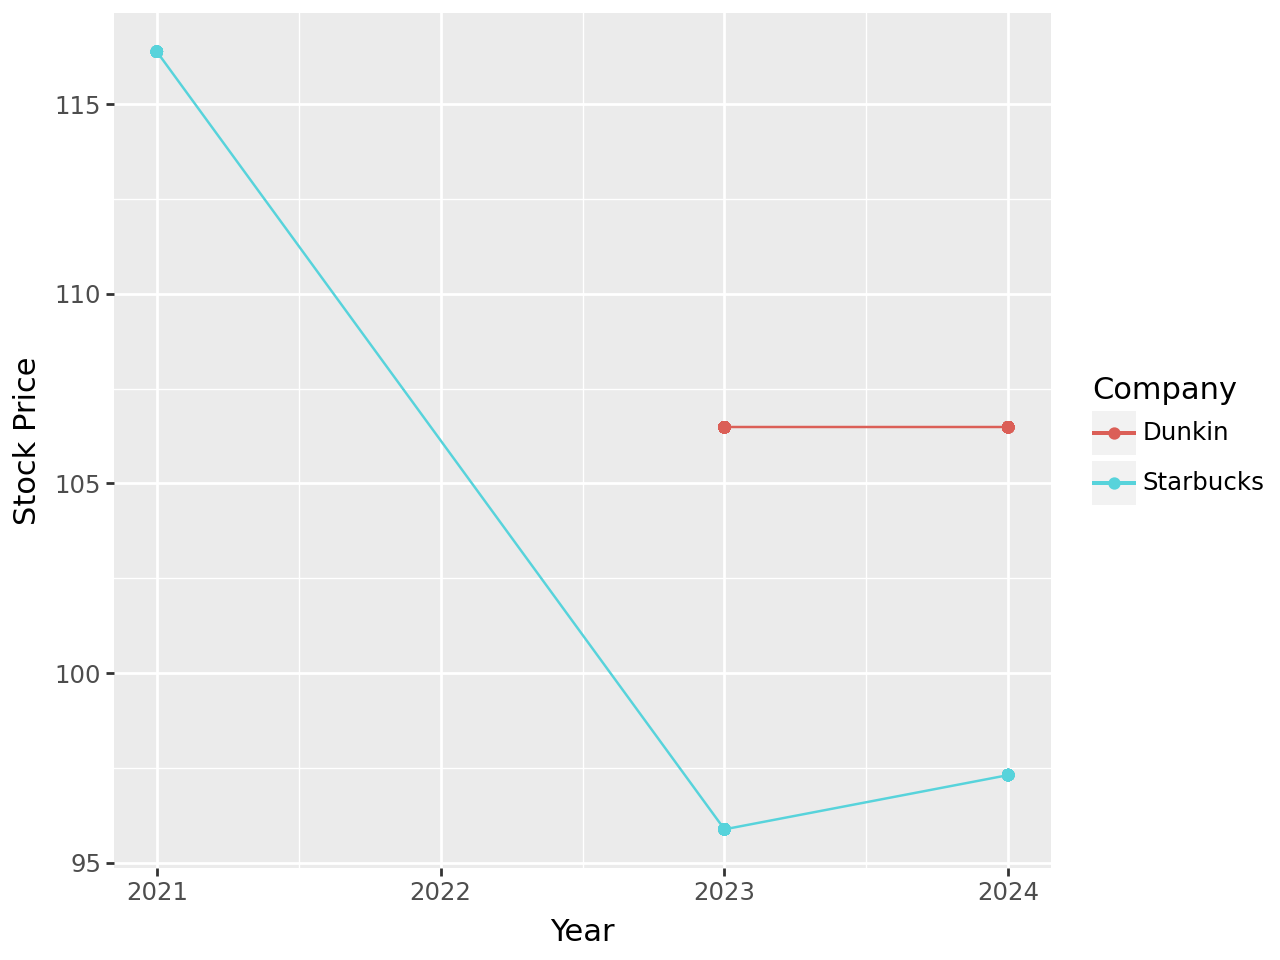

In [20]:
(ggplot(coffeefin,
aes(
  x = "Year",
  y = "Stock",
  color = "Company",
  group = "Company"
))
+ geom_point()
+ geom_line()
+xlab("Year")
+ylab("Stock Price")
)

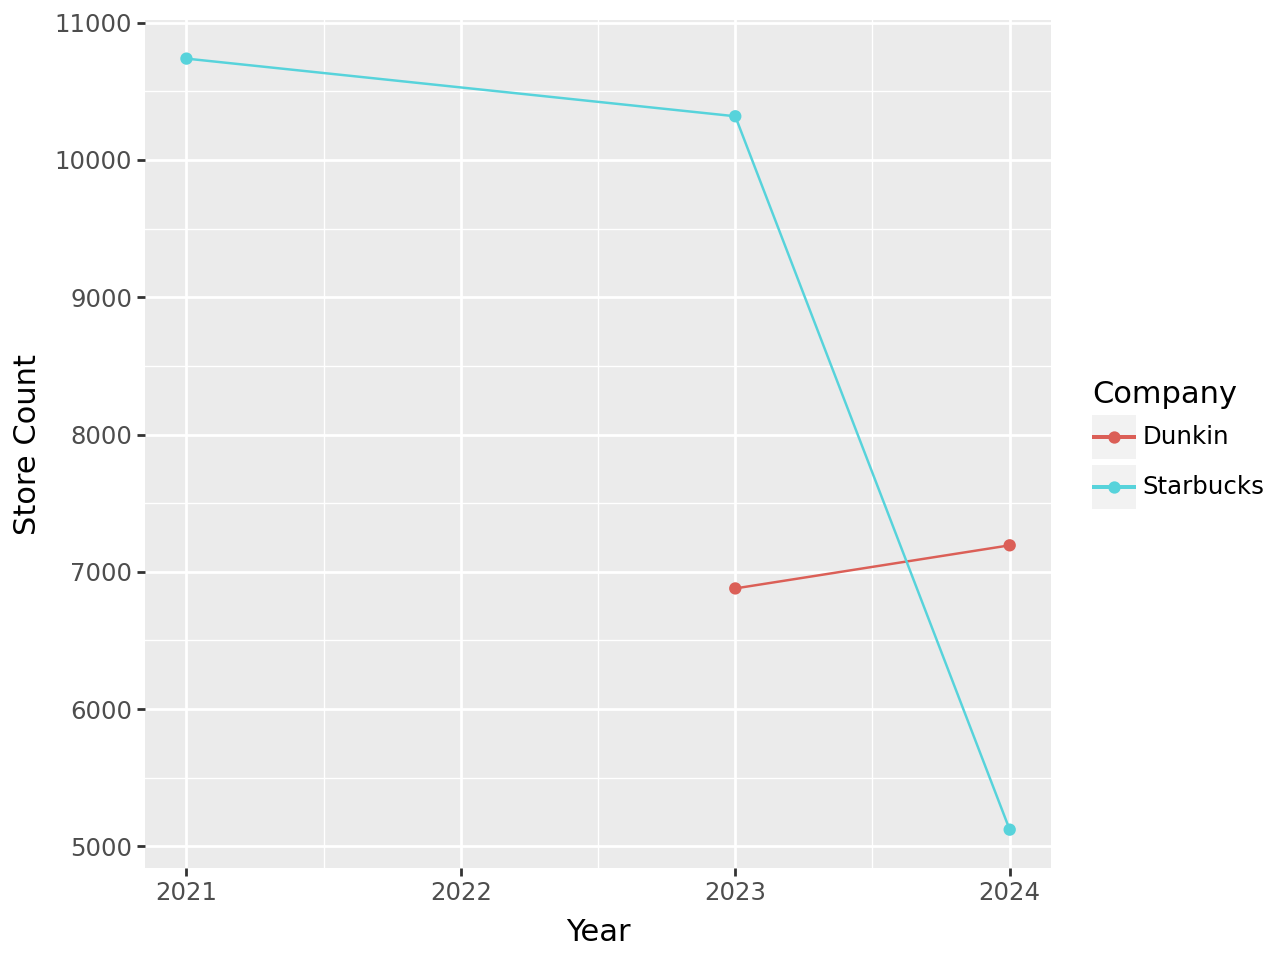

In [21]:
coffeereg2=coffeefin.groupby(["Year", "Company"])["Stores"].sum().reset_index()

(ggplot(coffeereg2,
aes(
  x = "Year",
  y = "Stores",
  color = "Company",
  group = "Company"
))
+ geom_point()
+ geom_line()
+xlab("Year")
+ylab("Store Count")
)

Looking at the two line graphs above you can see the correlation between stock prices and store counts per year. The hard thing is that Dunking isn't publicly traded. So its hard to see the effect stock price has on the store counts. However with starbucks it clear to see that the tank in stock prices in 2023 led to a decrease in the amount of stores in 2024. So there is a correlation between stock prices and store counts where when stock decreases the amount of stores also decreases.

Automate code

I'm going to ignore years because not all tables have the same years in the same order

In [22]:
import re
def webscrape(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    companyname = re.search(r'state-rankings/(.*?)-by-state', url).group(1).replace('-', ' ').title()
    print("Company is", companyname)
    table=(soup.find_all("table"))[0]

    df= []

    for row in table.find_all("tr")[1:]:

        state= row.find("th").text

        num=row.find("td").text

        df.append({
                "State": state,
                "Stores": num,
                "Company": companyname
    })
    df =pd.DataFrame(df)
    return df

test for dutchbros data

In [23]:
webscrape("https://worldpopulationreview.com/state-rankings/dutch-bros-by-state")

Company is Dutch Bros


,State,Stores,Company
0,Oregon,155,Dutch Bros
1,California,149,Dutch Bros
2,Texas,142,Dutch Bros
3,Arizona,76,Dutch Bros
4,Washington,66,Dutch Bros
5,Colorado,44,Dutch Bros
6,Idaho,37,Dutch Bros
7,Nevada,30,Dutch Bros
8,Utah,22,Dutch Bros
9,Oklahoma,21,Dutch Bros
